# Data Analysis

The aim of this Capstone project is to consolidate the knowledge, skills and competences acquired by learners during this programme. In this project students will select, specify, design, justify and implement a data analytics investigation that makes use of large data sets. The project will necessarily require data ingestion, wrangling, computation and analyses, and the production and presentation of a project and report. Students are guided by faculty in the selection of a data set, scope of investigation, initial exploratory data analysis, and formulation of hypotheses.

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import ast
import re

In [2]:
deck_df = pd.read_csv("data/data_decks_cleaned.csv")

Lets see if we can plot anything

In [3]:
%matplotlib inline

In [4]:
deck_df.head()

,deck_id,deck_name,deck_wins,deck_losses,deck_expansion,house_brobnar,house_dis,house_sanctum,house_mars,house_untamed,...,Zyzzix the Many,REDACTED,Æmber Conduction Unit,Æmber Imp,Æmberspine Mongrel,“John Smyth”,“Lion” Bautrem,score,expansion_coa,expansion_aoa
0,6216e565-a790-4e5b-b89a-4a814917b94e,"Leif “As”, Granjera de la Alcantarilla",2,1,435,True,True,True,False,False,...,0,0,0,0,0,0,0,1,False,True
1,50e28cdd-6e6b-4584-a8d1-1f22c081e906,"“Ivan” Valencia, Ship Chieftain",1,3,435,True,False,True,False,True,...,0,0,0,0,0,0,0,-2,False,True
2,3969e139-05d7-4a8a-ba60-0bb660cd057b,"Nasir, Canal Survivalist",2,1,435,True,False,True,True,False,...,0,0,0,0,0,0,1,1,False,True
3,5668bdc3-dea4-4226-92ba-91b003a5460e,"Destrolack, Observatory Recluse",4,4,435,False,False,True,False,True,...,0,0,0,0,0,0,0,0,False,True
4,749780f6-7acb-402a-9fd6-f6fbbcf888e1,"Tiberius, Navigatore della Guglia Aperta",8,4,341,False,False,False,True,True,...,1,0,0,0,0,1,0,4,True,False


In [5]:
deck_df.describe()

,deck_wins,deck_losses,deck_expansion,1-2 Punch,A Fair Game,Abond the Armorsmith,Agent Hoo-man,Ammonia Clouds,Anahita the Trader,Ancient Bear,...,Zorg,Zysysyx Shockworm,Zyzzix the Many,REDACTED,Æmber Conduction Unit,Æmber Imp,Æmberspine Mongrel,“John Smyth”,“Lion” Bautrem,score
count,67321.000000,67321.000000,67321.000000,67321.000000,67321.000000,67321.000000,67321.000000,67321.000000,67321.000000,67321.000000,...,67321.000000,67321.000000,67321.000000,67321.000000,67321.000000,67321.000000,67321.000000,67321.000000,67321.000000,67321.000000
mean,2.520833,2.340949,373.913474,0.066294,0.025638,0.070513,0.066606,0.103593,0.007977,0.139615,...,0.064660,0.068909,0.115061,0.010101,0.023633,0.073424,0.028253,0.123127,0.075638,0.179884
std,2.452996,1.786724,44.839711,0.298569,0.160109,0.309012,0.300557,0.368056,0.089952,0.434456,...,0.266174,0.305654,0.393665,0.103355,0.164938,0.311640,0.179880,0.411228,0.321604,2.468806
min,0.000000,0.000000,341.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-33.000000
25%,1.000000,1.000000,341.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000
50%,2.000000,2.000000,341.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,3.000000,3.000000,435.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
max,40.000000,39.000000,435.000000,4.000000,2.000000,4.000000,4.000000,4.000000,2.000000,4.000000,...,3.000000,4.000000,4.000000,2.000000,3.000000,4.000000,3.000000,5.000000,4.000000,26.000000


Notable pieces of info we can see from the above:
The max number of wins for any deck is 40 but 75% of decks have wins of 3 or less.
Similarly, the max number of losses is 39 but 75% again are 3 or less.
Scores range from -33 for the worst rated deck to 26 for the best rated deck, but the interquartile range is quite small going from -1 to 2.

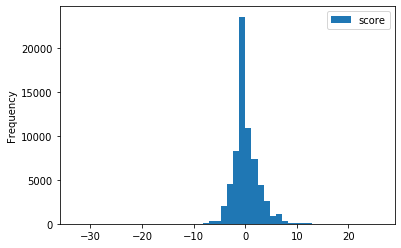

In [6]:
decks = deck_df[['score']]
my_plot = decks.plot(kind='hist', by='score', bins=50)

From this plot we can see the majority of the decks in the data have a score of 0!

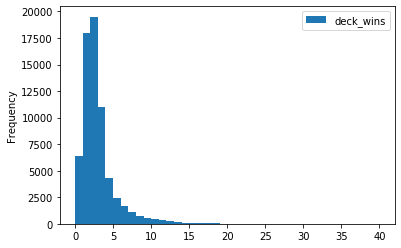

In [7]:
decks = deck_df[['deck_wins']]
my_plot = decks.plot(kind='hist', by='deck_wins', bins=40)

So most decks have wins between 0 and 5

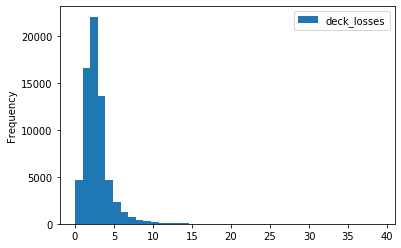

In [8]:
decks = deck_df[['deck_losses']]
my_plot = decks.plot(kind='hist', by='deck_losses', bins=40)

and most decks have losses between 0 and 5

In [9]:
decks = deck_df[['deck_wins','deck_losses', 'score', 'expansion_coa']]
decks.head()

,deck_wins,deck_losses,score,expansion_coa
0,2,1,1,False
1,1,3,-2,False
2,2,1,1,False
3,4,4,0,False
4,8,4,4,True


In [10]:
deck_exp = decks.groupby('expansion_coa')
deck_exp.size()

expansion_coa
False    23572
True     43749
dtype: int64

In [11]:
deck_exp_totals = deck_exp.sum()
deck_exp_totals.head()

,deck_wins,deck_losses,score
expansion_coa,,,
False,51193,51594,-401
True,118512,106001,12511


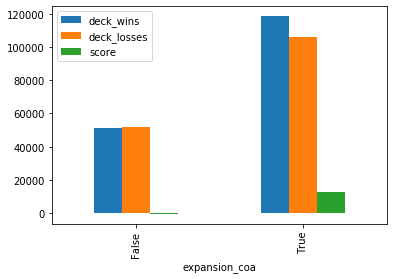

In [12]:
my_plot = deck_exp_totals.plot(kind='bar')

From this plot we can see that there are more decks in the first Call of the Archons expansion and those decks have a better total score.

In [13]:
deck_df.head()

,deck_id,deck_name,deck_wins,deck_losses,deck_expansion,house_brobnar,house_dis,house_sanctum,house_mars,house_untamed,...,Zyzzix the Many,REDACTED,Æmber Conduction Unit,Æmber Imp,Æmberspine Mongrel,“John Smyth”,“Lion” Bautrem,score,expansion_coa,expansion_aoa
0,6216e565-a790-4e5b-b89a-4a814917b94e,"Leif “As”, Granjera de la Alcantarilla",2,1,435,True,True,True,False,False,...,0,0,0,0,0,0,0,1,False,True
1,50e28cdd-6e6b-4584-a8d1-1f22c081e906,"“Ivan” Valencia, Ship Chieftain",1,3,435,True,False,True,False,True,...,0,0,0,0,0,0,0,-2,False,True
2,3969e139-05d7-4a8a-ba60-0bb660cd057b,"Nasir, Canal Survivalist",2,1,435,True,False,True,True,False,...,0,0,0,0,0,0,1,1,False,True
3,5668bdc3-dea4-4226-92ba-91b003a5460e,"Destrolack, Observatory Recluse",4,4,435,False,False,True,False,True,...,0,0,0,0,0,0,0,0,False,True
4,749780f6-7acb-402a-9fd6-f6fbbcf888e1,"Tiberius, Navigatore della Guglia Aperta",8,4,341,False,False,False,True,True,...,1,0,0,0,0,1,0,4,True,False


---------------------

In this next step we're using some basic machine learning. As one of the more reliable models, the random forest is my initial go to. After looking at how this model performs we'll assess it and consider if there are better options.

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
from sklearn.ensemble import RandomForestRegressor

In [16]:
clf=RandomForestRegressor(n_estimators=100)

In [17]:
x = deck_df
x = x.drop("deck_id", axis=1)
x = x.drop("deck_name", axis=1)
x = x.drop("deck_wins", axis=1)
x = x.drop("deck_losses", axis=1)
x = x.drop("score", axis=1)
y = deck_df[['score']]

In [18]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3) # 70% training and 30% test

In [19]:
%%time
clf.fit(x_train, y_train.values.ravel())

CPU times: user 18min 36s, sys: 24.2 s, total: 19min
Wall time: 23min 34s


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

Working out this model took a significant amount of time! Lets see if that well time well spent. We'll judge the performance using r squared.

In [20]:
y_pred=clf.predict(x_test)

In [21]:
from sklearn import metrics
print("Accuracy:",metrics.r2_score(y_test, y_pred))

Accuracy: 0.061072490597579465


In [22]:
feature_imp = pd.Series(clf.feature_importances_,index=x.columns).sort_values(ascending=False)
feature_imp

house_shadows             0.019041
Relentless Whispers       0.008015
Dust Pixie                0.007403
Wild Wormhole             0.006763
Hunting Witch             0.006753
Mother                    0.006734
Shooler                   0.006663
Nerve Blast               0.006419
Labwork                   0.006202
Urchin                    0.006167
Control the Weak          0.005569
Charette                  0.005475
Dust Imp                  0.005351
Nature’s Call             0.005313
Ganger Chieftain          0.005159
Bait and Switch           0.005061
Miasma                    0.005038
Lost in the Woods         0.004763
Routine Job               0.004529
Punch                     0.004498
Succubus                  0.004426
Blinding Light            0.004389
Bad Penny                 0.004314
Ghostly Hand              0.004289
Library of Babble         0.004265
Three Fates               0.004231
Ember Imp                 0.004145
Quixo the “Adventurer”    0.004067
Umbra               

So the random forest didn't work out well. On consideration, the data isn't really well suited for a decision tree. There are over 500 variables and only a very small percentage of those are going to have non zero values.

-------

Instead of looking at all the cards, lets try a simplier model using just the houses

In [23]:
x = deck_df[['house_brobnar','house_dis','house_sanctum','house_mars','house_untamed','house_shadows', 'house_logos']]
y = deck_df[['score']]

In [24]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3) # 70% training and 30% test
clf.fit(x_train, y_train.values.ravel())

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [25]:
y_pred=clf.predict(x_test)

In [26]:
print("Accuracy:",metrics.r2_score(y_test, y_pred))

Accuracy: 0.02370433080807588


In [27]:
feature_imp = pd.Series(clf.feature_importances_,index=x.columns).sort_values(ascending=False)
feature_imp

house_shadows    0.746133
house_mars       0.096809
house_dis        0.056371
house_sanctum    0.030727
house_brobnar    0.029450
house_untamed    0.020670
house_logos      0.019840
dtype: float64

No handles with labels found to put in legend.


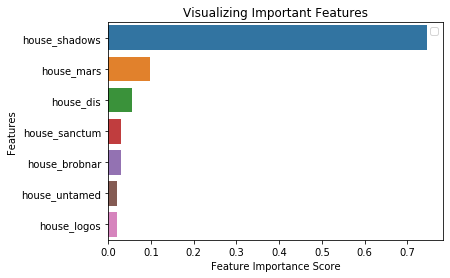

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

Despite the poor predictive performance, the model has indicated the shadows house is the most important feature which matches the experience of players of the game.

---------------

On consideration of the data and the options, it may be that a simple linear model actually gets the best performance. Each of card will end up with a coeffecient that could be considered a rating of how good it is. If you draw a card with a high coeffecient then you're more likely to win, but if you draw a card with a low coeffecient then you're more likely to lose.

In [29]:
X = deck_df.drop(['deck_id', 'deck_name', 'deck_wins', 'deck_losses', 'score',
                  'house_shadows', 'house_mars', 'house_untamed',
                  'house_logos', 'house_dis', 'house_sanctum',
                  'house_brobnar', 'deck_expansion', 'expansion_coa',
                  'expansion_aoa'], axis=1)
y = deck_df[['score']]

In [39]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3) # 70% training and 30% test

In [40]:
from sklearn import linear_model

In [41]:
lm = linear_model.LinearRegression()
model = lm.fit(x_train,y_train)

In [42]:
predictions = lm.predict(x_test)

In [43]:
lm.score(x_test, y_test)

0.09575644719823329

So the performance is still much lower than we would like but is improved from the random forest model. Given that we are working with inprecise data due to the nature of the unknown variables, this may actually be our best option!

------------

Redo the model using the full dataset for future predictions.

In [46]:
model = lm.fit(X, y)

In [63]:
pd.options.display.float_format = '{:.8f}'.format
coefDF = pd.DataFrame({'feature':X.columns, 'coef':lm.coef_[0]})
coefDF.sort_values(by=['coef'], ascending=False)

,feature,coef
214,Horseman of Pestilence,1552158955619.45336914
510,Timetraveller,612760462162.11718750
19,Bait and Switch,34466234.44764434
278,Martian Generosity,34466234.43007331
393,Relentless Whispers,34466234.36933992
311,Nature’s Call,34466234.36320478
144,Finishing Blow,34466234.35791811
218,Hypnotic Command,34466234.31691642
372,Proclamation 346E,34466234.30794329
258,Lights Out,34466234.28905416


Despite the poor performance of the overall model, the order of coefficients does reflect the accepted wisdom of the player base.

Here is an article which lists the following cards as the top 10:
https://hobbylark.com/card-games/best-keyforge-cards

- 01 Routine Job - Our rating 12th
- 02 Finishing Blow - Our rating 7th
- 03 Relentless Whispers - Our rating 5th
- 04 Bait and Switch - Our rating 3rd
- 05 Faygin - Our rating ?? outside the visible top
- 06 Lights Out - Our rating 10th
- 07 Urchin - Our rating ?? outside the visible top
- 08 Nerve Blast - Our rating 27th 
- 09 Timetraveller - Our rating 2nd
- 10 Help From Future Self - Our rating ?? outside the visible top

This is pretty good given that there are 582 cards to rate!

In [48]:
import pickle
filename = 'finalized_linear_model.sav'
pickle.dump(lm, open(filename, 'wb'))

--------

Testing some additional models

**Stochastic Gradient Descent**

In [17]:
from sklearn.model_selection import train_test_split
from sklearn import linear_model
X = deck_df.drop(['deck_id', 'deck_name', 'deck_wins', 'deck_losses', 'score',
                  'house_shadows', 'house_mars', 'house_untamed',
                  'house_logos', 'house_dis', 'house_sanctum',
                  'house_brobnar', 'deck_expansion', 'expansion_coa',
                  'expansion_aoa'], axis=1)
y = deck_df[['score']]
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3) # 70% training and 30% test

In [18]:
clf = linear_model.SGDRegressor(max_iter=1000, tol=1e-3)
clf.fit(x_train, y_train.values.ravel())

SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.01, fit_intercept=True, l1_ratio=0.15,
             learning_rate='invscaling', loss='squared_loss', max_iter=1000,
             n_iter_no_change=5, penalty='l2', power_t=0.25, random_state=None,
             shuffle=True, tol=0.001, validation_fraction=0.1, verbose=0,
             warm_start=False)

In [19]:
clf.score(x_test, y_test)

0.10284366818687218

-----------